In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

os.chdir("/home/marta/Documenti/eeg_rnn_repo/rnn-eeg-ad/")

In [42]:
all_data = []

for file in os.listdir('eeg2/'):
    if file.endswith(".npz"):
        f = np.load(os.path.join("eeg2/", file))
        data = f['eeg']
        
        # pca = PCA(n_components=2)
        pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

        data_reduced = pipeline.fit_transform(data)
        #data_reduced = pca.fit_transform(data)
        
        label = "hc" if file.endswith("N.npz") else "ad"
        
        df_temp = pd.DataFrame(data_reduced, columns=['Component_1', 'Component_2'])
        df_temp['Label'] = label
        
        all_data.append(df_temp)

final_df = pd.concat(all_data, ignore_index=True)

In [37]:
final_df['Label'].unique()

array(['ad', 'hc'], dtype=object)

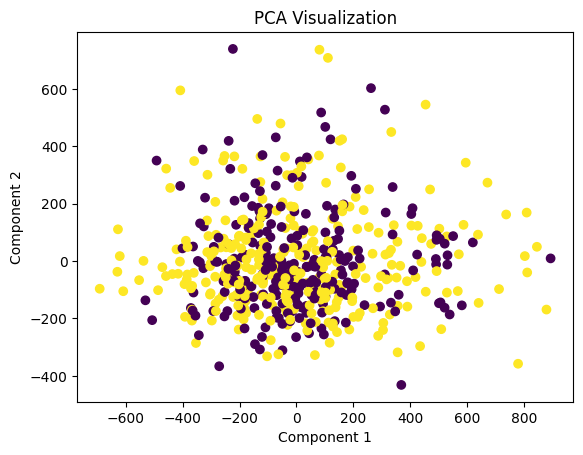

In [43]:
label_mapping = {'hc': 0, 'ad': 1}
final_df['Label_numeric'] = final_df['Label'].map(label_mapping)

plt.scatter(final_df['Component_1'], final_df['Component_2'], 
            c=final_df['Label_numeric'], cmap='viridis')

plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

In [2]:
ad = np.load("eeg2/S20_AD.npz")
hc = np.load("eeg2/S15_N.npz")

In [6]:
ad['eeg'].shape

(16, 241792)

In [56]:
df_ad = pd.DataFrame(ad['eeg'])
df_ad.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000,241792.000000
mean,11.633139,5.432297,4.969702,-17.038756,-1.840749,3.181244,1.254385,-2.254836,5.016136,-3.537489,7.043909,-0.009625,-2.686979,8.598374,7.238407,9.122587
std,48.059828,25.300145,29.878253,20.719000,20.316966,44.529131,16.794755,14.966024,16.433462,17.496012,13.404784,14.323231,13.096430,16.244494,19.738785,14.601565
min,-428.417580,-197.325272,-156.809088,-168.563783,-286.861036,-491.942955,-102.037210,-92.283313,-70.274522,-112.041206,-80.028418,-72.025221,-77.777519,-94.284113,-71.274922,-41.262934
25%,-5.248548,-7.249347,-13.001645,-30.258538,-14.002044,-11.000846,-9.000046,-12.001245,-5.498648,-14.752344,-1.497049,-9.250146,-10.750746,-1.997249,-3.998048,0.003550
50%,9.007146,5.255648,4.505348,-17.503443,-1.497049,2.504549,1.254049,-2.247349,5.505748,-3.247749,7.256447,1.003950,-2.497449,8.757046,10.757846,10.507746
75%,25.513740,17.010343,21.762241,-4.498248,10.757846,16.009944,11.258045,7.256447,16.009944,8.006747,16.009944,9.507346,5.255648,19.261242,21.011942,18.761043
max,989.398758,317.880524,327.134220,151.313990,253.604849,1103.944512,177.574480,70.781822,82.286417,136.558096,61.778225,91.039914,150.063490,114.799404,99.793410,139.559295


<Figure size 1600x800 with 0 Axes>

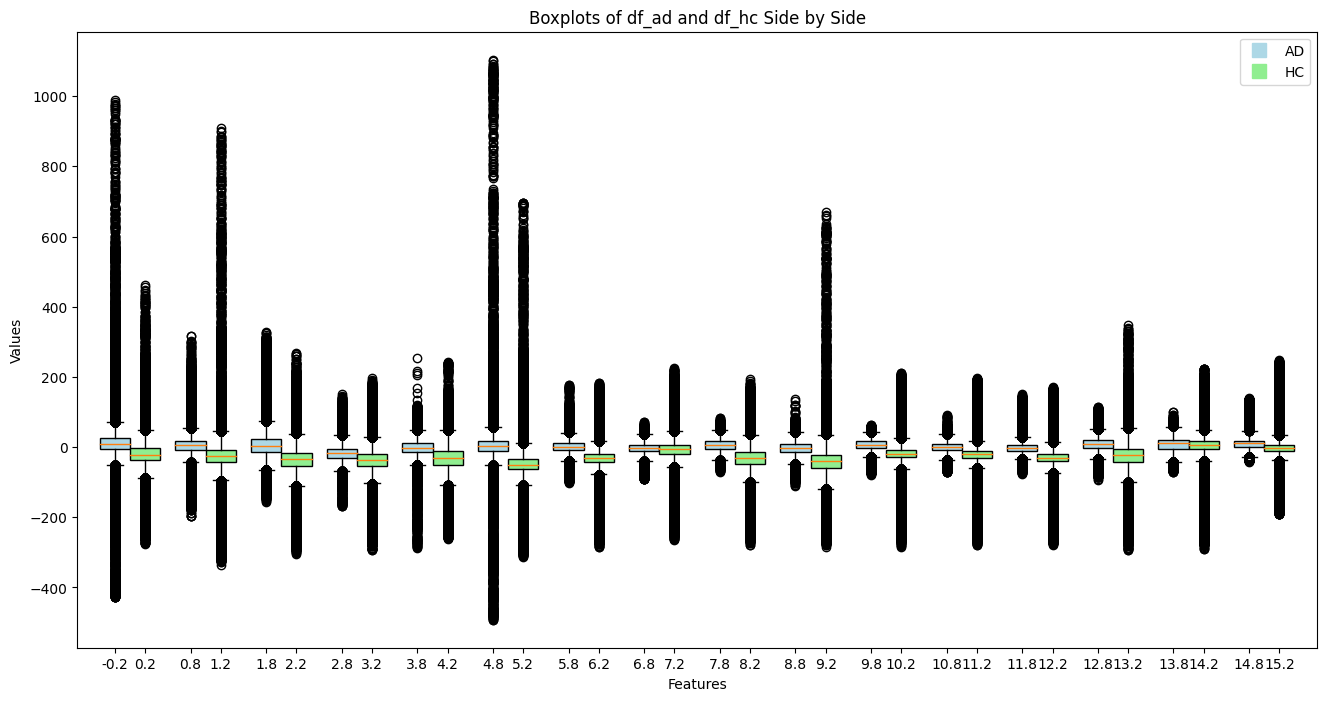

In [63]:

plt.figure(figsize=(16, 8))

box_ad = plt.boxplot(df_ad.T, 
                     positions=np.arange(df_ad.T.shape[1]) - 0.2, 
                     widths=0.4, 
                     patch_artist=True, 
                     boxprops=dict(facecolor="lightblue"))

box_hc = plt.boxplot(df_hc.T, 
                     positions=np.arange(df_hc.T.shape[1]) + 0.2, 
                     widths=0.4, 
                     patch_artist=True, 
                     boxprops=dict(facecolor="lightgreen"))

plt.title('Boxplots of df_ad and df_hc Side by Side')
plt.xlabel('Features')
plt.ylabel('Values')

blue_patch = plt.Line2D([], [], color='lightblue', marker='s', linestyle='None', markersize=10, label='AD')
green_patch = plt.Line2D([], [], color='lightgreen', marker='s', linestyle='None', markersize=10, label='HC')
plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.show()



In [51]:
df_hc = pd.DataFrame(hc['eeg'])
df_hc.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000,164608.000000
mean,-19.512894,-24.967927,-35.022207,-36.835089,-28.738240,-44.077800,-29.773941,-5.961582,-31.113186,-39.287278,-18.579978,-20.575484,-29.111161,-22.853533,5.409845,0.843170
std,39.169149,51.081714,37.463782,34.760983,35.313571,47.007518,29.942666,32.591290,33.647728,42.217151,30.462994,29.011656,29.256546,35.575771,31.447256,34.296975
min,-277.357240,-336.130717,-303.617730,-293.113534,-262.351246,-311.871026,-285.610537,-265.602545,-279.107939,-283.609738,-284.860237,-280.108339,-280.358439,-293.863834,-289.362035,-192.073174
25%,-37.261335,-42.263333,-54.018029,-54.018029,-50.016430,-63.521825,-42.263333,-18.253743,-49.016031,-60.770726,-29.508238,-30.258538,-41.012834,-42.263333,-6.248948,-11.000846
50%,-21.505042,-25.006440,-35.260536,-37.511435,-30.258538,-50.016430,-30.758738,-5.498648,-30.758738,-41.012834,-18.753943,-21.004842,-30.758738,-23.255741,5.005548,-1.747149
75%,-3.247749,-6.999247,-17.003243,-21.004842,-10.750746,-33.759937,-18.253743,7.006347,-15.002444,-22.255341,-7.249347,-10.750746,-19.254142,-3.998048,16.009944,7.006347
max,460.687567,909.116689,268.860943,197.832571,241.600054,697.031974,182.076278,226.594060,194.581273,671.021584,210.837766,197.332372,172.572482,348.892912,223.592861,247.852552


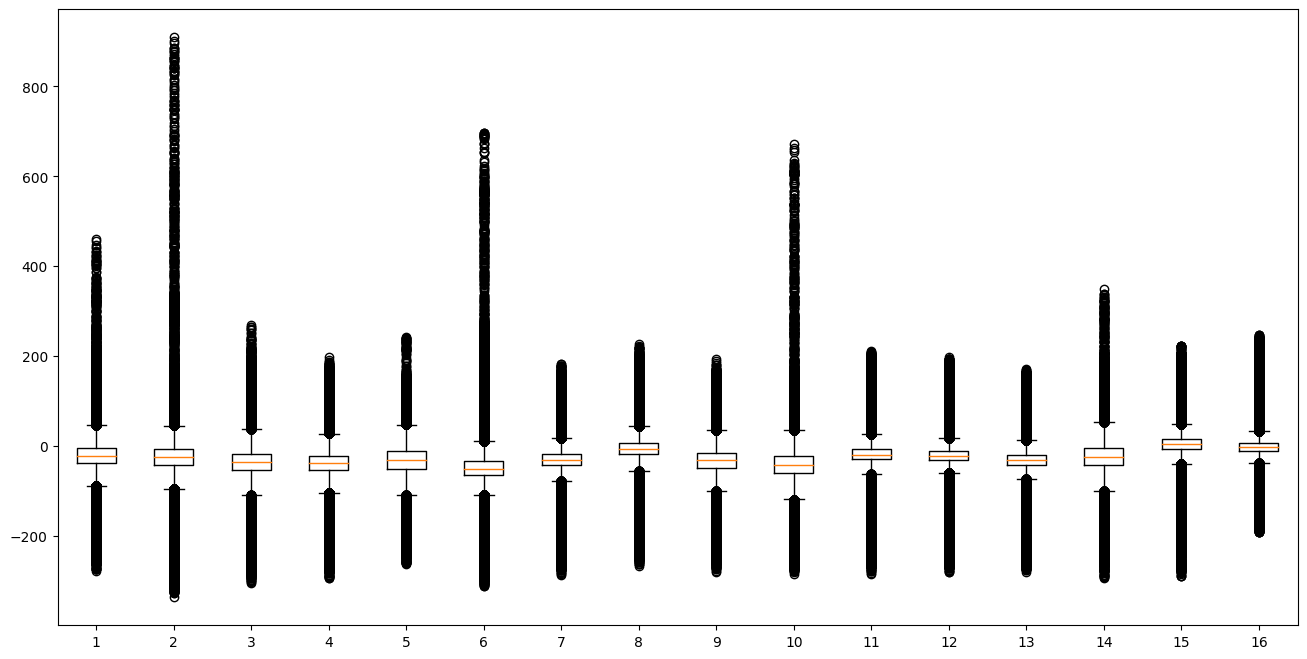

In [58]:
plt.figure(figsize=(16,8))

plt.show()

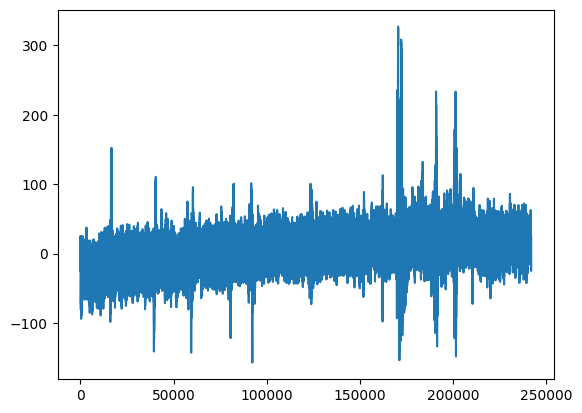

In [19]:
plt.plot(ad['eeg'][0:100][2])

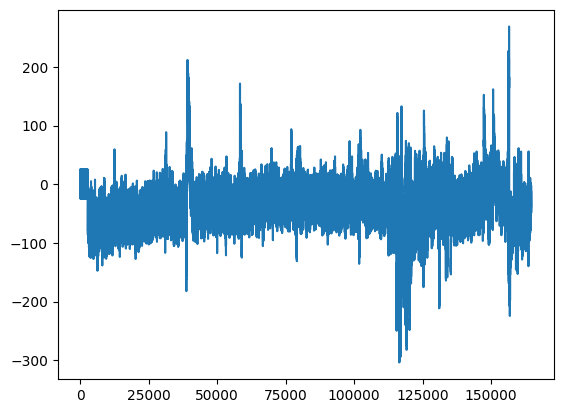

In [20]:
plt.plot(hc['eeg'][0:100][2])


In [21]:

pca = PCA(n_components=2)
ad_reduced = pca.fit_transform(ad['eeg'])
hc_reduced = pca.fit_transform(hc['eeg'])


/tmp/ipykernel_122350/2710978771.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ad_reduced[:, 0], ad_reduced[:, 1], cmap='viridis')
/tmp/ipykernel_122350/2710978771.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(hc_reduced[:, 0], hc_reduced[:, 1], cmap='viridis')


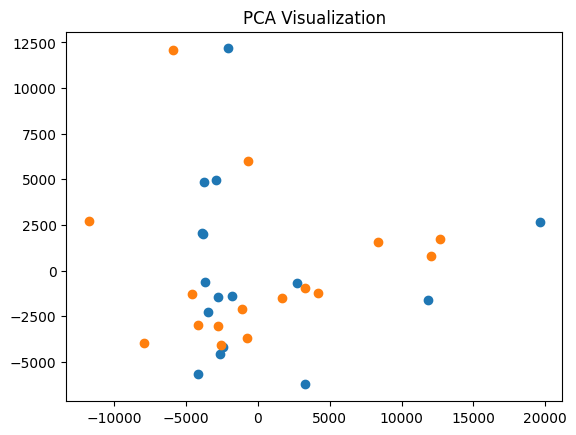

In [24]:
plt.scatter(ad_reduced[:, 0], ad_reduced[:, 1], cmap='viridis')
plt.scatter(hc_reduced[:, 0], hc_reduced[:, 1], cmap='viridis')
plt.title('PCA Visualization')
plt.show()

In [3]:
import matplotlib.pyplot as plt 

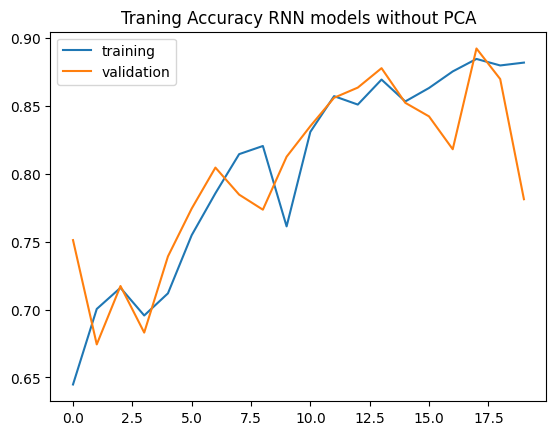

In [11]:
fit_accuracy = [0.6448, 0.7004, 0.716, 0.6956, 0.7119, 0.7547, 0.7856, 0.8144, 0.8204, 0.7612, 0.8308, 0.8571, 0.8509, 0.8693, 0.8532, 0.8631, 0.8753, 0.8845, 0.8797, 0.8818]
fit_val_accuracy = [0.7511, 0.6743, 0.7173, 0.683, 0.7391, 0.7743, 0.8045, 0.7846, 0.7735, 0.8125, 0.835, 0.8559, 0.8634, 0.8777, 0.8522, 0.8422, 0.818, 0.8922, 0.8697, 0.7812]


plt.title("Traning Accuracy RNN models without PCA")
plt.plot(fit_accuracy, label="training")
plt.plot(fit_val_accuracy, label="validation")
plt.legend()

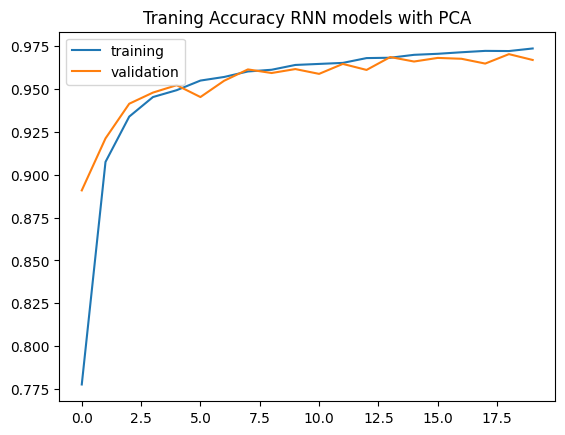

In [12]:
fit_val_accuracy = [0.8908, 0.9211, 0.9413, 0.9478, 0.9521, 0.9452, 0.9547, 0.9613, 0.9592, 0.9615, 0.9587, 0.9645, 0.961, 0.9685, 0.9659, 0.968, 0.9675, 0.9647, 0.9702, 0.9668]
fit_accuracy = [0.7777, 0.9074, 0.9338, 0.9452, 0.9492, 0.9548, 0.9569, 0.9601, 0.9611, 0.9639, 0.9645, 0.9651, 0.9679, 0.9681, 0.9698, 0.9704, 0.9713, 0.9721, 0.972, 0.9735]

plt.title("Traning Accuracy RNN models with PCA")
plt.plot(fit_accuracy, label="training")
plt.plot(fit_val_accuracy, label="validation")
plt.legend()